In [1]:
import tensorflow as tf

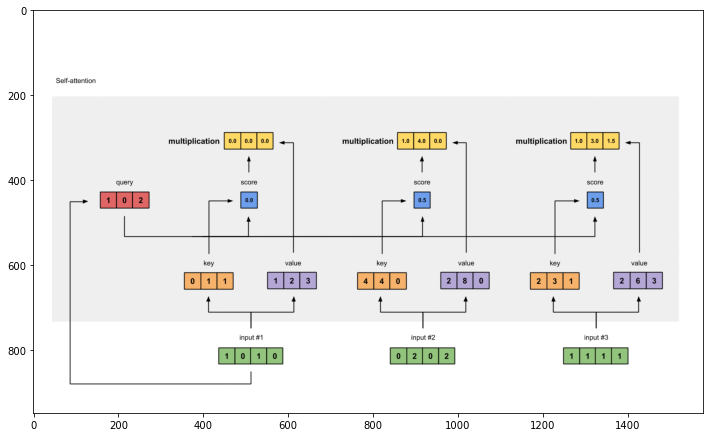

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("Self-Attention.gif")
plt.figure(figsize=(12, 8))
# To iterate through the entire gif
try:
    while 1:
        plt.imshow(im)
        im.seek(im.tell()+1)
        # do something to im
except EOFError:
    pass # end of sequence

In [3]:
x = [[1,0,1,0], # Input 1
     [0,2,0,2], # Input 2
     [1,1,1,1]] # Input 3

x = tf.constant(x,dtype=tf.float32)

In [6]:
w_key = [[0,0,1],
         [1,1,0],
         [0,1,0],
         [1,1,0]]

w_query =[[1,0,1],
         [1,0,0],
         [0,0,1],
         [0,1,1]]

w_value =[[0,2,0],
         [0,3,0],
         [1,0,3],
         [1,1,0]]

w_key = tf.constant(w_key, dtype=tf.float32)
w_query = tf.constant(w_query, dtype=tf.float32)
w_value = tf.constant(w_value, dtype=tf.float32)

In [9]:
keys = x@w_key
querys = x@w_query
values = x@w_value

In [12]:
attention_scores = querys@tf.transpose(keys)
print(attention_scores)

tf.Tensor(
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]], shape=(3, 3), dtype=float32)


In [19]:
from tensorflow.nn import softmax
attention_softmax = softmax(attention_scores, axis=-1)

In [33]:
weighted_values = values[:, None]* tf.transpose(attention_softmax)[:,:,None]

In [36]:
outputs = tf.math.reduce_sum(weighted_values, axis=0)
outputs

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1.936621 , 6.683105 , 1.5950683],
       [1.9999939, 7.963991 , 0.0539764],
       [1.9997045, 7.759892 , 0.3583893]], dtype=float32)>

Within the self-attention module:
- Dimension
- Bias

Inputs to the self-attention module:
- Embedding module
- Positional Encoding
- Truncating
- Masking

Adding more self-attention modules:
- Multihead
- Layer Stacking 

Modules between self-attention modules:
- Linear transformations
- LayerNorm